In [ ]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.manifold import TSNE
from nltk.tokenize import word_tokenize
np.random.seed(0)
import nltk
from nltk.corpus import stopwords
import string
from nltk import word_tokenize, FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import numpy as np
np.random.seed(0)
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
import nltk
nltk.download('gutenberg')

from nltk.corpus import gutenberg, stopwords
from nltk.collocations import *
from nltk import FreqDist
from nltk import word_tokenize
import string
import re

In [ ]:
#Open Json files

In [ ]:
df1 = pd.read_json('Vogue_2019.json')

In [ ]:
df2 = pd.read_json('Vogue_Past.json')

In [ ]:
df = pd.concat([df1, df2], ignore_index=True, sort=False)

In [6]:
#to replace ly lly and ity in articles that tokenization could not replace

In [7]:
df['Text'].replace(regex=True,inplace=True,to_replace=r'ly',value=r'')
df['Text'].replace(regex=True,inplace=True,to_replace=r'lly',value=r'')
df['Text'].replace(regex=True,inplace=True,to_replace=r'ity',value=r'')

In [8]:
df['Text'][1]

'Andrea Lieberman just solved the riddle of how to wear a pantsuit on 85-degree days: She whipped hers up in ultra-light, ultra-crisp cotton poplin. For women like Lieberman, who prefer easy yet sharp-looking summer clothes to the season’s ubiquitous boho dresses, her paper-thin blazers and belted trousers will feel like something of a revelation. And in case they still sound business-y, consider how Lieberman styled them: A black cotton suit was paired with a heavy metal–inspired California Love T-shirt, the proceeds of which will benefit relief efforts for the state’s recent wildfires, and a deconstructed suit consisting of a baby blue poplin blazer and khaki trousers was styled with a stretchy knit tank. Oh, and both were shown with flat sandals. It doesn’t get much easier than that. Designing those kinds of easy yet polished pieces is Lieberman’s m.o. Also in the mix: asymmetrical dresses in crink emerald viscose or python-printed silk, tie-dyed cotton sweaters, leather shorts, and

In [9]:
df['Text'].replace(regex=True,inplace=True,to_replace=r'-',value=r' ')

In [10]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer

In [11]:

import numpy as np
import logging
import pyLDAvis.gensim
import json
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity

from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array

from nltk.stem.wordnet import WordNetLemmatizer

docs =array(df['Text'])

def docs_preprocessor(docs):
    tokenizer = RegexpTokenizer(r'\w+')
    for idx in range(len(docs)):
        docs[idx] = docs[idx].lower()  # Convert to lowercase.
        docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

    # Remove numbers, but not words that contain numbers.
    docs = [[token for token in doc if not token.isdigit()] for doc in docs]
    
    # Remove words that are only one character.
    docs = [[token for token in doc if len(token) > 3] for doc in docs]
    
    # Lemmatize all words in documents.
    lemmatizer = WordNetLemmatizer()
    docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]
  
    return docs
# Perform function on our document
docs = docs_preprocessor(docs)
#Create Biagram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(docs, min_count=10)
trigram = Phrases(bigram[docs])

for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
    for token in trigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
#Remove rare & common tokens 
# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)
dictionary.filter_extremes(no_below=10, no_above=0.1)
#Create dictionary and corpus required for Topic Modeling
corpus = [dictionary.doc2bow(doc) for doc in docs]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))
print(corpus[:1])

Number of unique tokens: 8600
Number of documents: 3553
[[(0, 1), (1, 3), (2, 1), (3, 1), (4, 1), (5, 1), (6, 3), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 3), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 3), (26, 1), (27, 3), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 3), (38, 1), (39, 2), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 3), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 3), (67, 1), (68, 1), (69, 1), (70, 1), (71, 3), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 3), (95, 1), (96, 1), (97, 3), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (1

In [12]:
#first try of setting parameters

In [13]:
# Set parameters.
num_topics = 5
chunksize = 500 
passes = 20 
iterations = 400
eval_every = 1  

# Make a index to word dictionary.
temp = dictionary[0]  # only to "load" the dictionary.
id2word = dictionary.id2token

lda_model = LdaModel(corpus=corpus, id2word=id2word, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)
# Print the Keyword in the 5 topics
print(lda_model.print_topics())


[(0, '0.009*"resort_collection" + 0.006*"slip_dress" + 0.005*"long_sleeved" + 0.005*"button_down" + 0.004*"floral_print" + 0.004*"have_been" + 0.003*"slip" + 0.003*"ready_wear" + 0.003*"thinking_about" + 0.003*"feel_like"'), (1, '0.005*"embroidery" + 0.004*"flower" + 0.003*"looked_like" + 0.003*"spring_collection" + 0.003*"couture" + 0.003*"more_than" + 0.003*"haute_couture" + 0.003*"tulle" + 0.003*"track_pant" + 0.003*"wrap_dress"'), (2, '0.004*"have_been" + 0.004*"last_season" + 0.003*"this_time" + 0.002*"rather_than" + 0.002*"creative_director" + 0.002*"collaboration_with" + 0.002*"london" + 0.002*"fashion_week" + 0.002*"would_have" + 0.002*"along_with"'), (3, '0.011*"paired_with" + 0.006*"resort_collection" + 0.006*"black_white" + 0.004*"paired" + 0.004*"fall_collection" + 0.004*"design_team" + 0.004*"worn_over" + 0.004*"starting_point" + 0.004*"feminine" + 0.003*"could_easi"'), (4, '0.015*"piccioli" + 0.014*"moncler" + 0.009*"pierpaolo_piccioli" + 0.008*"valentino" + 0.007*"step_f

In [14]:
# Compute Coherence Score using c_v
coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4656124213549676


In [15]:
# Compute Coherence Score using UMass
coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=dictionary, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  -6.53321330482112


In [16]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [17]:
## graph to get optimal number of topics for coherence score 

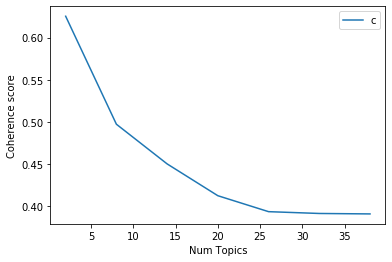

In [18]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=docs, start=2, limit=40, step=6)
# Show graph
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [19]:
#testing new coherrence score with anotherr lda model

In [20]:
# Set parameters.
num_topics = 13
chunksize = 500 
passes = 20 
iterations = 400
eval_every = 1  

# Make a index to word dictionary.
temp = dictionary[0]  # only to "load" the dictionary.
id2word = dictionary.id2token

lda_model2 = LdaModel(corpus=corpus, id2word=id2word, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)
# Print the Keyword in the 5 topics
print(lda_model.print_topics())

[(0, '0.009*"resort_collection" + 0.006*"slip_dress" + 0.005*"long_sleeved" + 0.005*"button_down" + 0.004*"floral_print" + 0.004*"have_been" + 0.003*"slip" + 0.003*"ready_wear" + 0.003*"thinking_about" + 0.003*"feel_like"'), (1, '0.005*"embroidery" + 0.004*"flower" + 0.003*"looked_like" + 0.003*"spring_collection" + 0.003*"couture" + 0.003*"more_than" + 0.003*"haute_couture" + 0.003*"tulle" + 0.003*"track_pant" + 0.003*"wrap_dress"'), (2, '0.004*"have_been" + 0.004*"last_season" + 0.003*"this_time" + 0.002*"rather_than" + 0.002*"creative_director" + 0.002*"collaboration_with" + 0.002*"london" + 0.002*"fashion_week" + 0.002*"would_have" + 0.002*"along_with"'), (3, '0.011*"paired_with" + 0.006*"resort_collection" + 0.006*"black_white" + 0.004*"paired" + 0.004*"fall_collection" + 0.004*"design_team" + 0.004*"worn_over" + 0.004*"starting_point" + 0.004*"feminine" + 0.003*"could_easi"'), (4, '0.015*"piccioli" + 0.014*"moncler" + 0.009*"pierpaolo_piccioli" + 0.008*"valentino" + 0.007*"step_f

In [21]:
# Compute Coherence Score using c_v
coherence_model_lda2 = CoherenceModel(model=lda_model2, texts=docs, dictionary=dictionary, coherence='c_v')
coherence_lda2 = coherence_model_lda2.get_coherence()
print('\nCoherence Score: ', coherence_lda2)


Coherence Score:  0.384556851805403


In [22]:
#testing new number of topics at another elbow to see coherence score

In [23]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

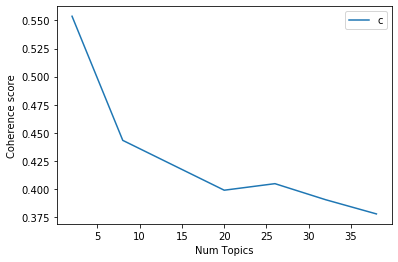

In [24]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=docs, start=2, limit=40, step=6)
# Show graph
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Set parameters.
num_topics = 8
chunksize = 500 
passes = 20 
iterations = 400
eval_every = 1  

# Make a index to word dictionary.
temp = dictionary[0]  # only to "load" the dictionary.
id2word = dictionary.id2token

lda_model3 = LdaModel(corpus=corpus, id2word=id2word, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)
# Print the Keyword in the 5 topics
print(lda_model.print_topics())

In [ ]:
# Compute Coherence Score using c_v
coherence_model_lda3 = CoherenceModel(model=lda_model3, texts=docs, dictionary=dictionary, coherence='c_v')
coherence_lda3 = coherence_model_lda3.get_coherence()
print('\nCoherence Score: ', coherence_lda3)

In [ ]:
#Visualizing topics with gensim: chose 8 topics because it gave highest coherence score

In [ ]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model3, corpus, dictionary)
LDAvis_prepared